In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/top-1000-global-tech-companies-dataset-2024/Top 1000 technology companies.csv


In [3]:
# Load the data
data = pd.read_csv("/kaggle/input/top-1000-global-tech-companies-dataset-2024/Top 1000 technology companies.csv")
data.head()

,Ranking,Company,Market Cap,Stock,Country,Sector,Industry
0,1,Apple Inc.,$2.866 T,AAPL,United States,Technology,Consumer Electronics
1,2,Microsoft Corporation,$2.755 T,MSFT,United States,Technology,Software—Infrastructure
2,3,Nvidia Corporation,$1.186 T,NVDA,United States,Technology,Semiconductors
3,4,Broadcom Inc.,$495.95 B,AVGO,United States,Technology,Semiconductors
4,5,Taiwan Semiconductor Manufacturing Company Lim...,$487.64 B,2330,Taiwan,Technology,Semiconductors


# Fields and Data Types 📊:
The dataset includes the following attributes:

- **Ranking**: The rank of the company within the dataset (integer).
- **Company**: The name of the company (string).
- **Market Cap**: The market capitalization of the company, typically expressed in billions or millions (string).
- **Stock**: The stock ticker symbol representing the company in the stock market (string).
- **Country**: The country where the company is headquartered (string).
- **Sector**: The broad sector to which the company belongs, such as Technology, Finance, etc. (string).
- **Industry**: The specific industry within the sector, providing more detailed classification (string).

In [4]:
# Display information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ranking     1000 non-null   int64 
 1   Company     1000 non-null   object
 2   Market Cap  1000 non-null   object
 3   Stock       1000 non-null   object
 4   Country     1000 non-null   object
 5   Sector      1000 non-null   object
 6   Industry    1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB
None


In [5]:
# Descriptive statistics
data.describe()

,Ranking
count,1000.000000
mean,500.500000
std,288.819436
min,1.000000
25%,250.750000
50%,500.500000
75%,750.250000
max,1000.000000


In [6]:
# Display column names
data.columns

Index(['Ranking', 'Company', 'Market Cap', 'Stock', 'Country', 'Sector',
       'Industry'],
      dtype='object')

In [7]:
# Renames the dataset and removes the space
data=data.rename(columns={
    "Market Cap":"Market_Cap",
    })
data.head()

,Ranking,Company,Market_Cap,Stock,Country,Sector,Industry
0,1,Apple Inc.,$2.866 T,AAPL,United States,Technology,Consumer Electronics
1,2,Microsoft Corporation,$2.755 T,MSFT,United States,Technology,Software—Infrastructure
2,3,Nvidia Corporation,$1.186 T,NVDA,United States,Technology,Semiconductors
3,4,Broadcom Inc.,$495.95 B,AVGO,United States,Technology,Semiconductors
4,5,Taiwan Semiconductor Manufacturing Company Lim...,$487.64 B,2330,Taiwan,Technology,Semiconductors


# Handling missing data

In [8]:
# Verify the data
print(data.isnull().sum())

Ranking       0
Company       0
Market_Cap    0
Stock         0
Country       0
Sector        0
Industry      0
dtype: int64


# EDA (Exploratory Data Analysis)

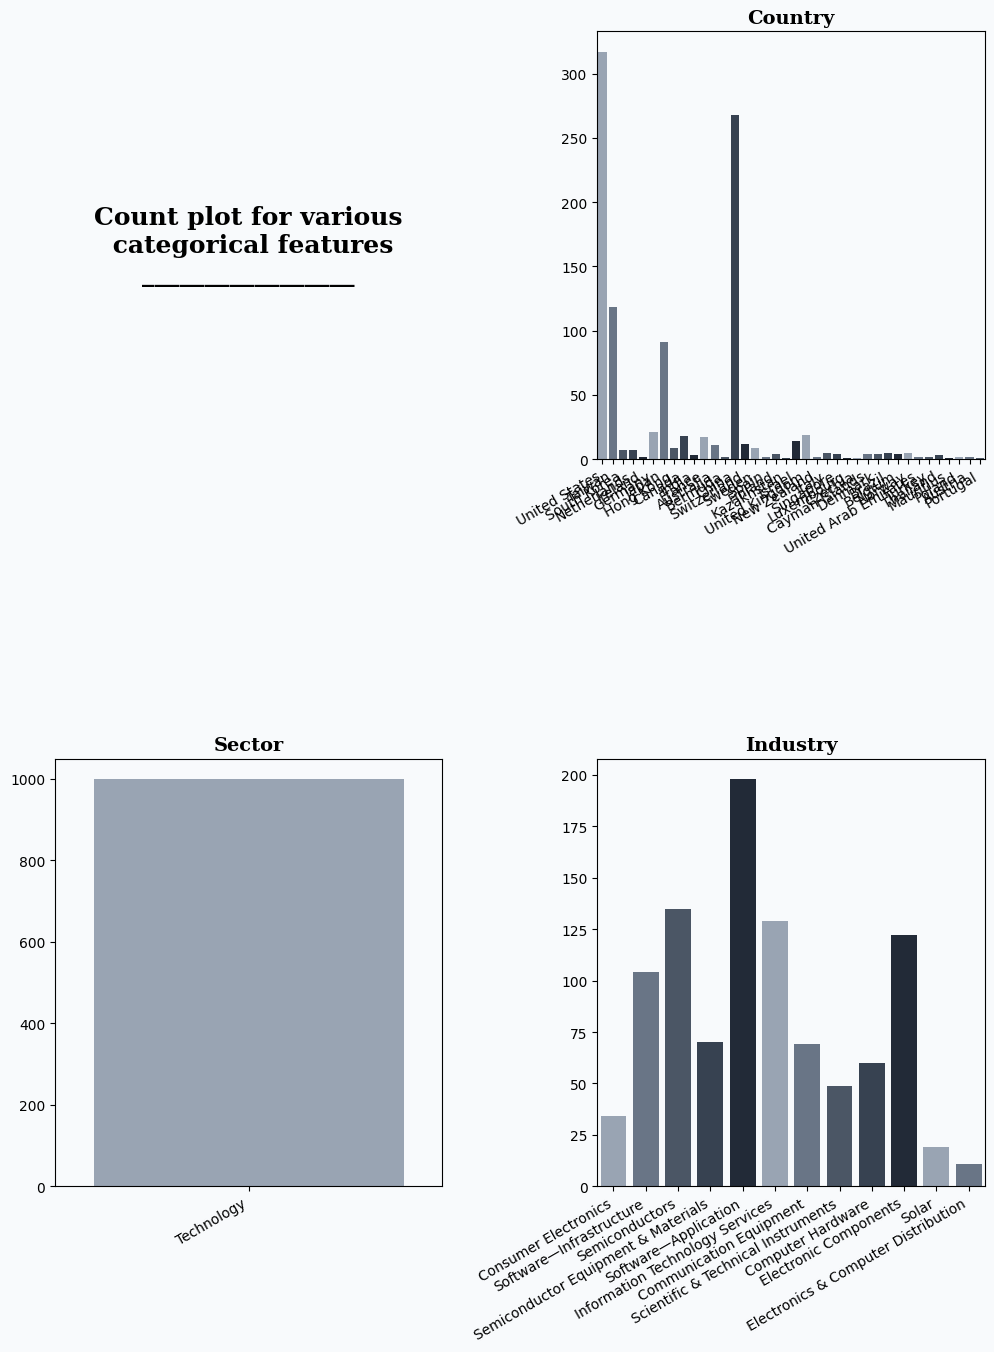

In [20]:
# Figure adjustments

# Larger size for better visualization
fig = plt.figure(figsize=(12, 15))  
gs = fig.add_gridspec(2, 2)
# Increases space between subplots
gs.update(wspace=0.4, hspace=0.7)  


background_color = "#f8fafc"
color_palette = ["#94a3b8", "#64748b", "#475569", "#334155", "#1e293b"]
fig.patch.set_facecolor(background_color)
axes = [fig.add_subplot(gs[i,j]) for i in range(2) for j in range(2)]
for ax in axes:
    ax.set_facecolor(background_color)

# Title of the plot
axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Count plot for various\n categorical features\n_________________',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=18, fontweight='bold',
             fontfamily='serif',
             color="#000000")

# Plot for each categorical feature
plot_features = ['Country', 'Sector', 'Industry']
titles = ["Country", "Sector", "Industry"]

for i, feature in enumerate(plot_features):
    ax = axes[i + 1]
    ax.set_title(titles[i], loc='center', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    sns.countplot(ax=ax, data=data, x=feature, palette=color_palette)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=10)

# Adjust and show
plt.show()

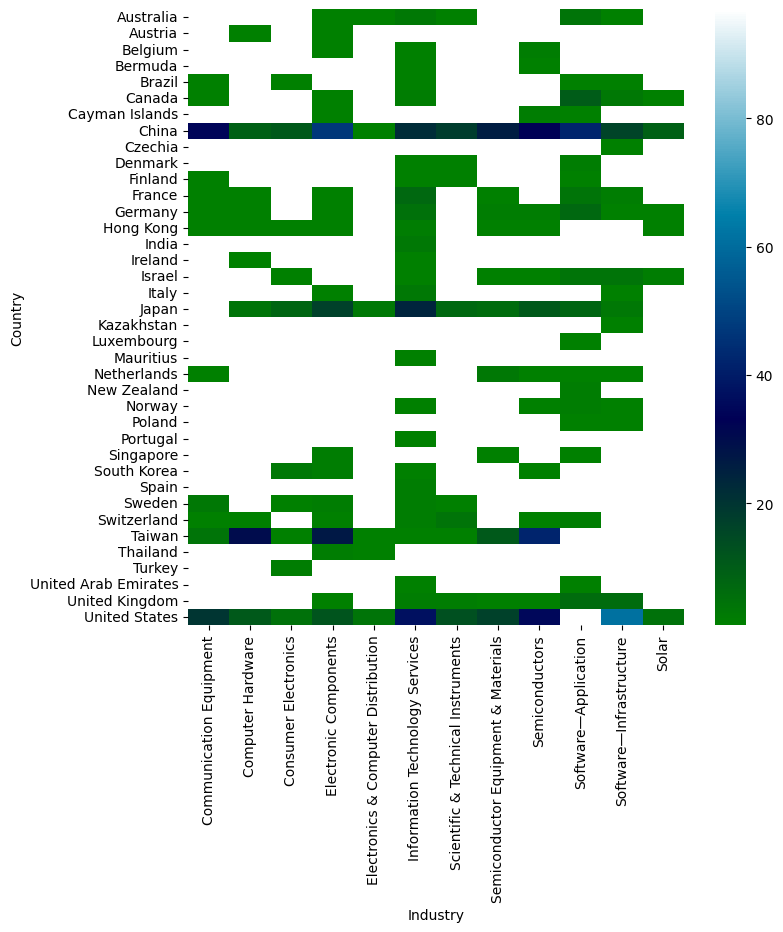

In [21]:
# Country vs Industry
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Country'].value_counts()
    for x_label, grp in data.groupby('Industry')
})
sns.heatmap(df_2dhist, cmap='ocean')
plt.xlabel('Industry')
_ = plt.ylabel('Country')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

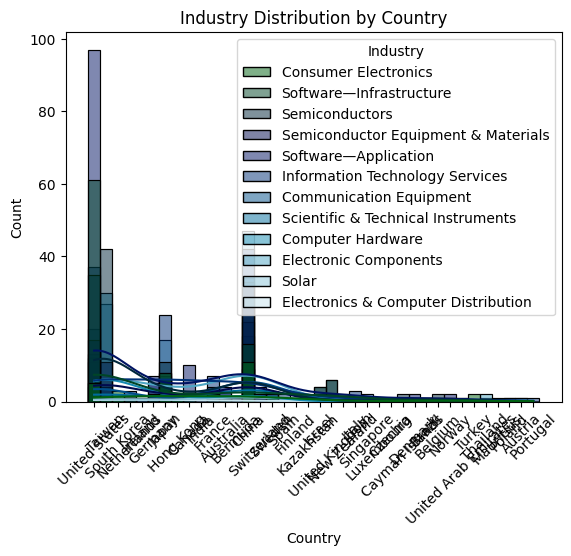

In [26]:
# Industry Distribution by Country
plt.xticks(rotation=45)
#sns.histplot(data=data, x='Industry', hue="Country",palette="ocean", kde=True)
sns.histplot(data=data, x='Country', hue="Industry",palette="ocean", kde=True)
plt.title('Industry Distribution by Country')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

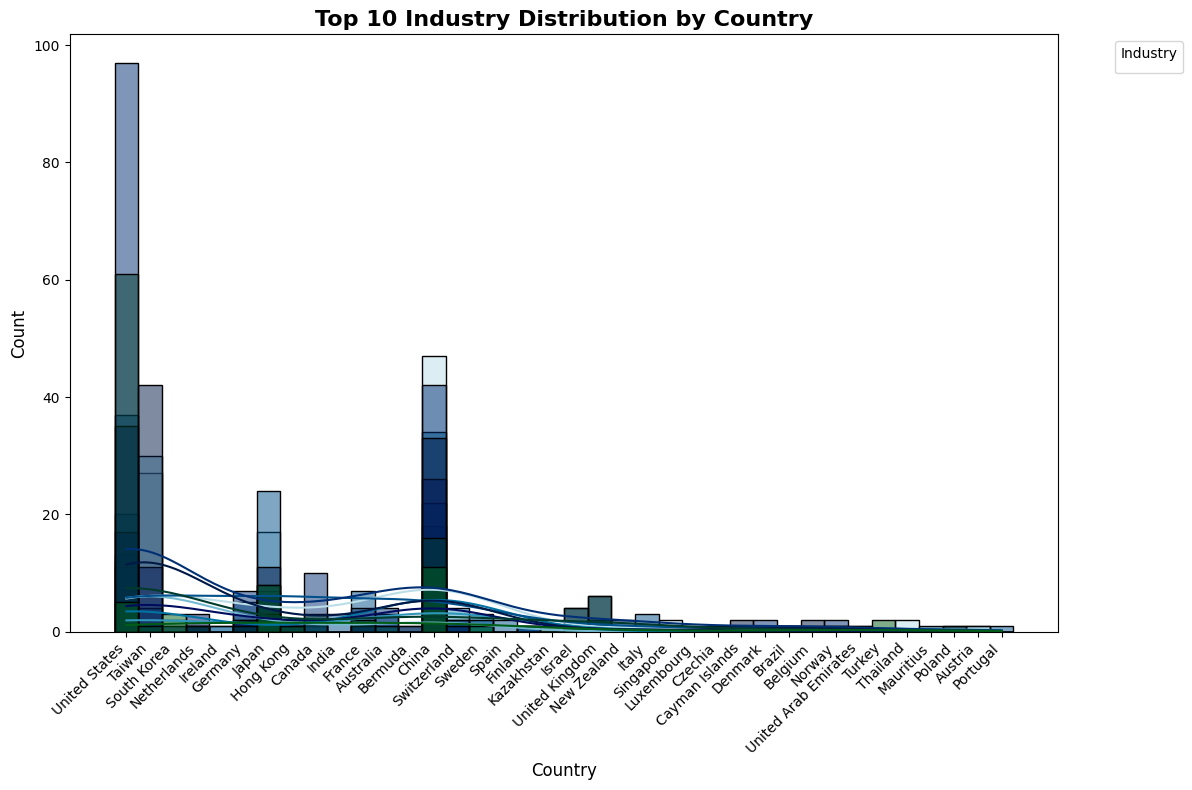

In [27]:
# Filter to get the top 10 most frequent industries
top_industries = data['Industry'].value_counts().nlargest(10).index
filtered_data = data[data['Industry'].isin(top_industries)]

# Industry distribution chart by country for the 10 most frequent industries
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45, ha='right')
sns.histplot(data=filtered_data, x='Country', hue='Industry', palette="ocean", kde=True)
plt.title('Top 10 Industry Distribution by Country', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

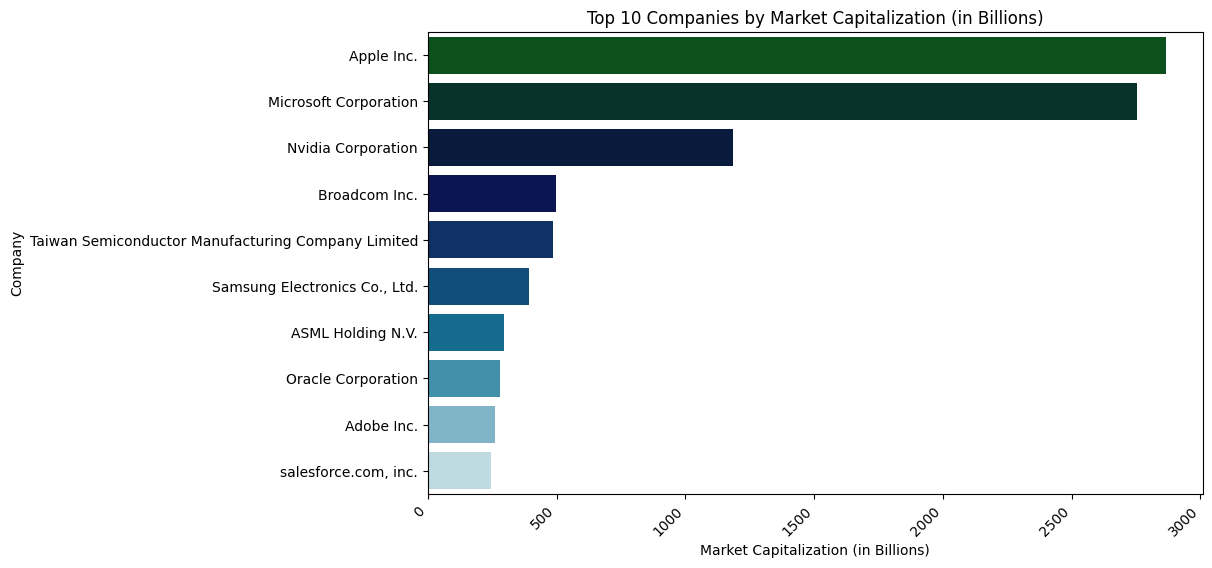

In [47]:
# Top 10 Companies by Market Capitalization
top_10 = data[['Company', 'Market_Cap']].head(10)
top_10['Market_Cap'] = top_10['Market_Cap'].str.replace('$', '').str.replace(',', '')
top_10['Market_Cap'] = top_10['Market_Cap'].apply(lambda x: float(x.replace('T', '')) * 1e12 if 'T' in x else float(x.replace('B', '')) * 1e9)
top_10['Market_Cap'] = top_10['Market_Cap'] / 1e9

plt.figure(figsize=(10, 6))
sns.barplot(x='Market_Cap', y='Company', data=top_10, palette='ocean')
plt.title('Top 10 Companies by Market Capitalization (in Billions)')
plt.xlabel('Market Capitalization (in Billions)')
plt.ylabel('Company')
plt.show()

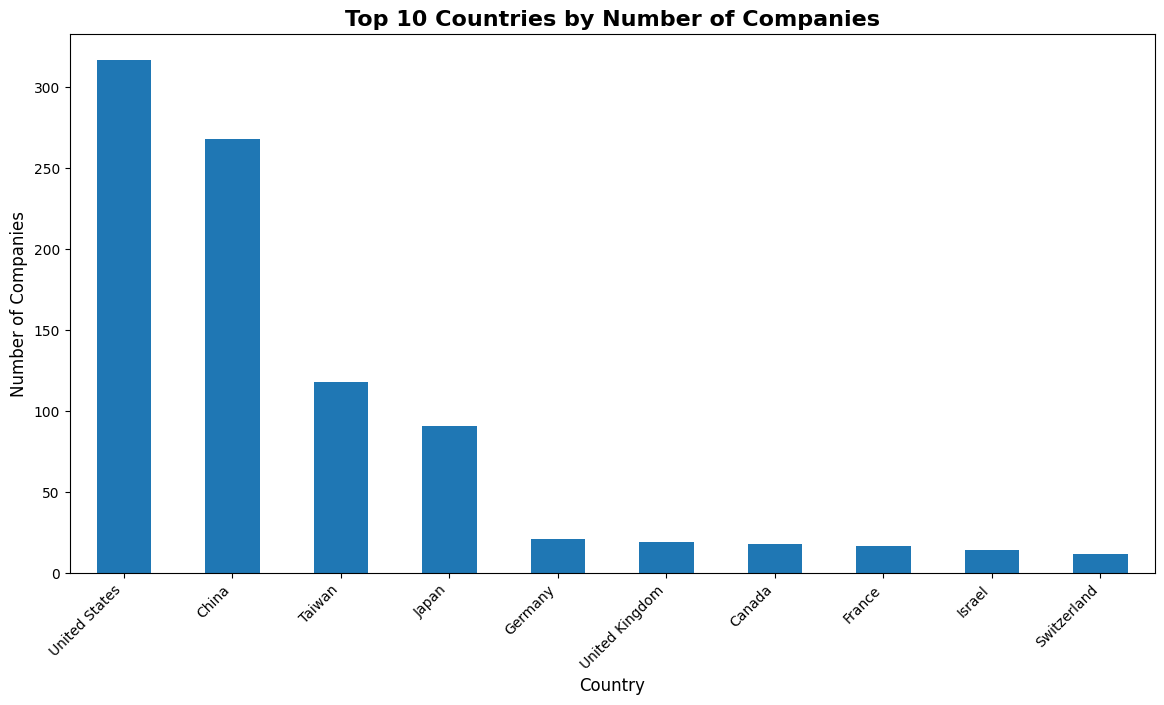

In [48]:
# Top 10 Companies by Number of Companies
plt.figure(figsize=(14, 7))
data['Country'].value_counts().head(10).plot(kind='bar', color="#1f77b4")
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Countries by Number of Companies', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Companies', fontsize=12)
plt.show()

=== Statistical Summary of Numerical Variables ===
           Ranking
count  1000.000000
mean    500.500000
std     288.819436
min       1.000000
25%     250.750000
50%     500.500000
75%     750.250000
max    1000.000000


===== Distribution of Categorical Variables ======
Distribution of Country:
Country
United States           317
China                   268
Taiwan                  118
Japan                    91
Germany                  21
United Kingdom           19
Canada                   18
France                   17
Israel                   14
Switzerland              12
Australia                11
Sweden                    9
Hong Kong                 9
Netherlands               7
South Korea               7
Norway                    5
Brazil                    5
Italy                     5
Singapore                 4
Cayman Islands            4
Belgium                   4
Finland                   4
Denmark                   4
Thailand                  3
India               

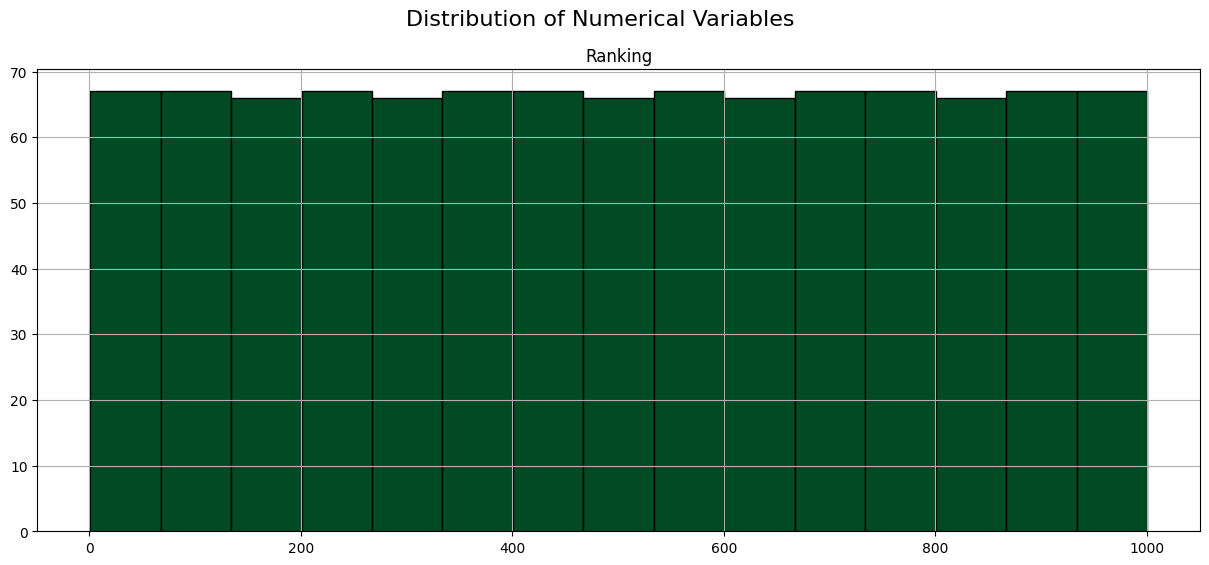

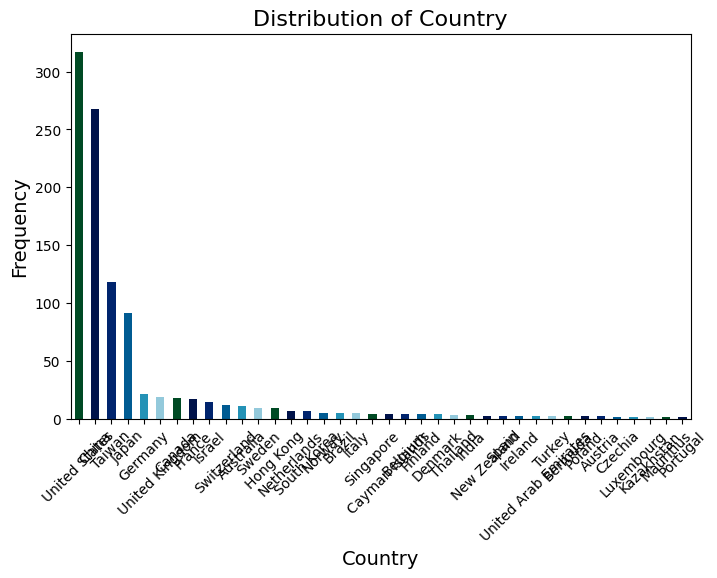

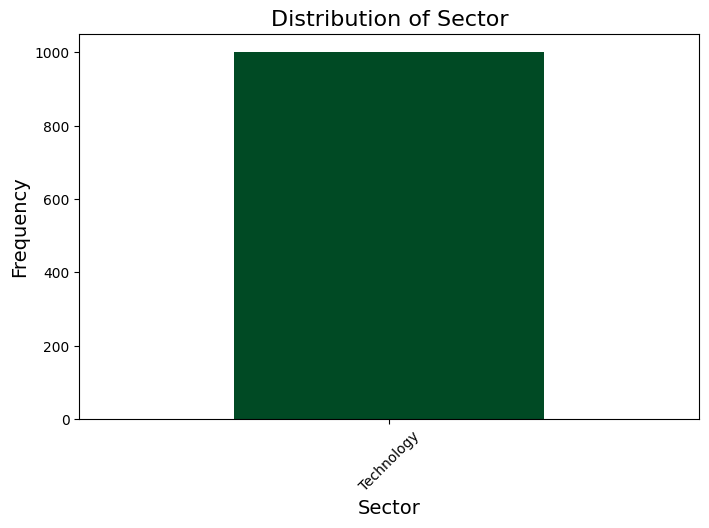

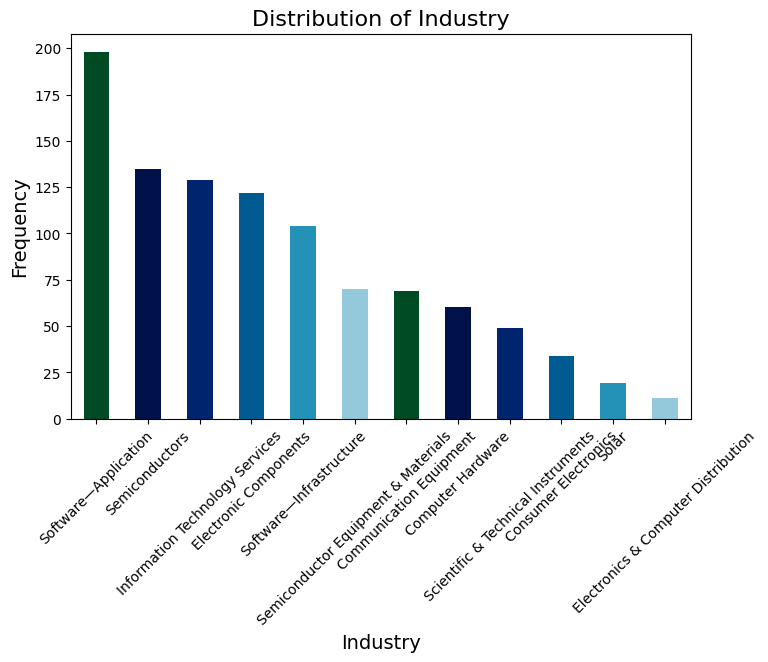

============== Correlation Analysis ==============
         Ranking
Ranking      1.0


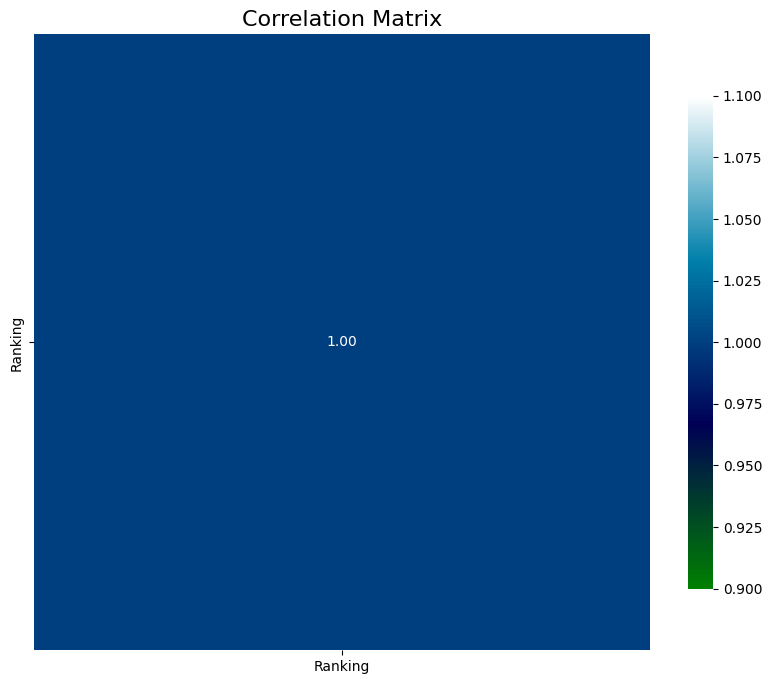

In [50]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette
sns.set_palette("ocean")

# Load the data
# data = pd.read_csv('path_to_your_data.csv')

# Generate a statistical summary of numerical variables
def generate_statistical_summary(data):
    print(" Statistical Summary of Numerical Variables ".center(50, "="))
    print(data.describe())
    print("\n")

# Distribution of categorical variables
def categorical_distribution(data, categorical_cols):
    print(" Distribution of Categorical Variables ".center(50, "="))
    for col in categorical_cols:
        print(f"Distribution of {col}:")
        print(data[col].value_counts())
        print("\n")

# Distribution graphs for numerical variables
def plot_numerical_distributions(data, numerical_cols):
    data[numerical_cols].hist(bins=15, figsize=(15, 6), edgecolor='black')
    plt.suptitle('Distribution of Numerical Variables', fontsize=16)
    plt.show()

# Bar graphs for categorical variables
def plot_categorical_bars(data, categorical_cols):
    for col in categorical_cols:
        plt.figure(figsize=(8, 5))
        data[col].value_counts().plot(kind='bar', color=sns.color_palette("ocean"))
        plt.title(f'Distribution of {col}', fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(rotation=45)
        plt.show()

# Correlation analysis between numerical variables
def correlation_analysis(numeric_df):
    print(" Correlation Analysis ".center(50, "="))
    corr = numeric_df.corr()
    print(corr)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="ocean", square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

# Execute functions
generate_statistical_summary(data)
categorical_distribution(data, ['Country', 'Sector', 'Industry'])
plot_numerical_distributions(data, ['Ranking'])
plot_categorical_bars(data, ['Country', 'Sector', 'Industry'])
correlation_analysis(data.select_dtypes(include='number'))